In [1]:
import pandas as pd
import numpy as np
import sqlite3
import mlflow
import dagshub
import os
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

dagshub.init(repo_owner='abdsalam25', repo_name='churn-project', mlflow=True)

try:
    df = pd.read_csv("../churn_data.csv")
except:
    df = pd.read_csv("churn_data.csv")

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

features = ['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'Partner', 'Dependents', 'PhoneService']
X = df[features]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

cleaner = ColumnTransformer(transformers=[
    ('num', Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), ['tenure', 'MonthlyCharges']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService'])
])

models_config = {
    "Ridge": {
        "model": RidgeClassifier(),
        "params": {"model__alpha": [0.1, 1.0]}
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(),
        "params": {"model__n_estimators": [50], "model__learning_rate": [0.1]}
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {"model__n_estimators": [50], "model__max_depth": [3]}
    },
    "LightGBM": {
        "model": LGBMClassifier(verbose=-1),
        "params": {"model__n_estimators": [50]}
    }
}

experiment_id = 1

for model_name, config in models_config.items():
    for use_pca in [False, True]:
        for use_tuning in [False, True]:
            
            run_name = f"Exp{experiment_id}_{model_name}_PCA-{use_pca}_Tuned-{use_tuning}"
            print(f"Running {run_name}...")
            
            mlflow.set_experiment("Final_Project_Experiments")
            with mlflow.start_run(run_name=run_name):
                
                steps = [('preprocessor', cleaner)]
                if use_pca:
                    steps.append(('pca', PCA(n_components=2)))
                steps.append(('model', config["model"]))
                pipeline = Pipeline(steps)
                
                if use_tuning:
                    model = GridSearchCV(pipeline, config["params"], cv=3, scoring='f1_macro')
                else:
                    model = pipeline
                
                model.fit(X_train, y_train)
                
                if use_tuning:
                    score = model.best_score_
                    final_model = model.best_estimator_
                else:
                    score = cross_val_score(model, X_train, y_train, cv=3, scoring='f1_macro').mean()
                    final_model = model
                
                mlflow.log_param("model", model_name)
                mlflow.log_param("pca", use_pca)
                mlflow.log_metric("cv_f1", score)
                
                if experiment_id == 16:
                    joblib.dump(final_model, "../model.joblib")
                    print("Saved final model.")

            experiment_id += 1

print("DONE! Check DagsHub now.")

Accessing as abdsalam25

Initialized MLflow to track repo "abdsalam25/churn-project"

Repository abdsalam25/churn-project initialized!

Running Exp1_Ridge_PCA-False_Tuned-False...


2025/12/15 20:55:25 INFO mlflow.tracking.fluent: Experiment with name 'Final_Project_Experiments' does not exist. Creating a new experiment.


🏃 View run Exp1_Ridge_PCA-False_Tuned-False at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0/runs/90ac3736005e499ca63d6ece4a6eeabc
🧪 View experiment at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0
Running Exp2_Ridge_PCA-False_Tuned-True...
🏃 View run Exp2_Ridge_PCA-False_Tuned-True at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0/runs/68fbd481d59942b88e6f05129a96db28
🧪 View experiment at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0
Running Exp3_Ridge_PCA-True_Tuned-False...
🏃 View run Exp3_Ridge_PCA-True_Tuned-False at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0/runs/96e8f528d99d46e3b748e017d5129b2e
🧪 View experiment at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0
Running Exp4_Ridge_PCA-True_Tuned-True...
🏃 View run Exp4_Ridge_PCA-True_Tuned-True at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0/runs/c28ab3803dfa46b081407df

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:14] WARN

🏃 View run Exp9_XGBoost_PCA-False_Tuned-False at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0/runs/d7aaeaf68a6e44909edc01536769a6a7
🧪 View experiment at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0
Running Exp10_XGBoost_PCA-False_Tuned-True...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:21] WARN

🏃 View run Exp10_XGBoost_PCA-False_Tuned-True at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0/runs/f5bae3f707e84ea6b7bad7eab1446785
🧪 View experiment at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0
Running Exp11_XGBoost_PCA-True_Tuned-False...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:28] WARN

🏃 View run Exp11_XGBoost_PCA-True_Tuned-False at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0/runs/f81909badb8f4c3ea1b61bdfd1a860b0
🧪 View experiment at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0
Running Exp12_XGBoost_PCA-True_Tuned-True...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:56:35] WARN

🏃 View run Exp12_XGBoost_PCA-True_Tuned-True at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0/runs/256c3f7bdd5e4e7c855d181654009fe0
🧪 View experiment at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0
Running Exp13_LightGBM_PCA-False_Tuned-False...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run Exp13_LightGBM_PCA-False_Tuned-False at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0/runs/cda69246a37b414dbccbac42e4654ac8
🧪 View experiment at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0
Running Exp14_LightGBM_PCA-False_Tuned-True...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run Exp14_LightGBM_PCA-False_Tuned-True at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0/runs/c45501d6f1d644d0a86656cb8b08b470
🧪 View experiment at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0
Running Exp15_LightGBM_PCA-True_Tuned-False...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🏃 View run Exp15_LightGBM_PCA-True_Tuned-False at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0/runs/ab41d1777fc04854926154619f1fef64
🧪 View experiment at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0
Running Exp16_LightGBM_PCA-True_Tuned-True...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Saved final model.
🏃 View run Exp16_LightGBM_PCA-True_Tuned-True at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0/runs/53d9637e40df4d0f863268820f0f9616
🧪 View experiment at: https://dagshub.com/abdsalam25/churn-project.mlflow/#/experiments/0
DONE! Check DagsHub now.


Generating Scree Plot...


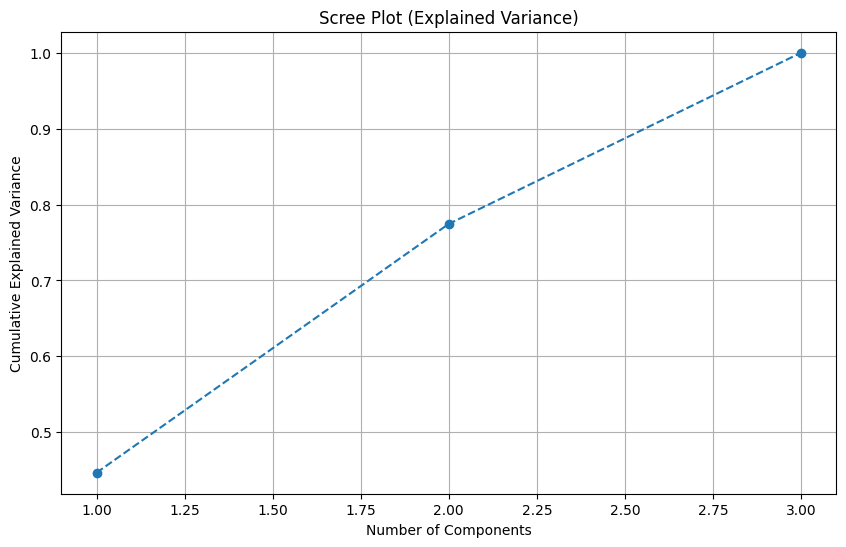

Generating Model Comparison Plot...


/var/folders/49/vm1jcskx3vg1j0qp06k8rrdw0000gn/T/ipykernel_37636/3551117917.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=runs, y='Plot_Name', x='metrics.cv_f1', orient='h', palette='viridis')


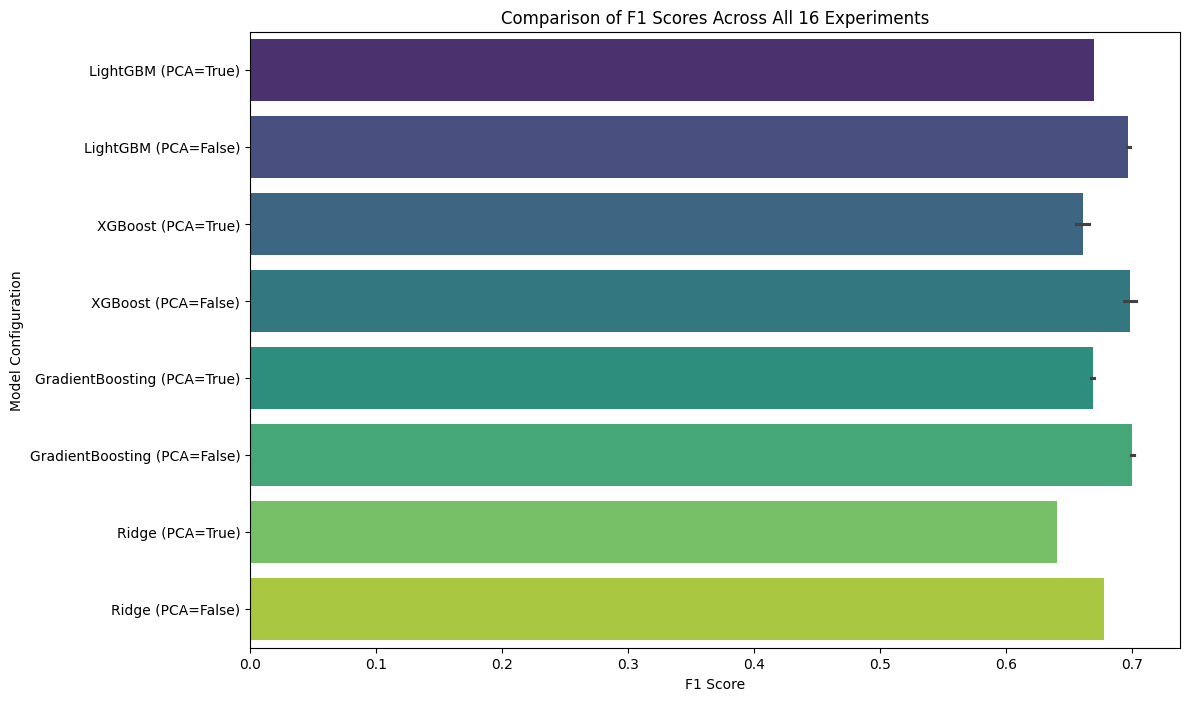

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

print("Generating Scree Plot...")

X_num = X.select_dtypes(include=['number'])

pipeline_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
X_scaled = pipeline_num.fit_transform(X_num)

# 3. Run PCA
pca = PCA()
pca.fit(X_scaled)

# 4. Draw the Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Scree Plot (Explained Variance)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


print("Generating Model Comparison Plot...")

try:
    current_experiment = mlflow.get_experiment_by_name("Final_Project_Experiments")
    exp_id = current_experiment.experiment_id
    runs = mlflow.search_runs(experiment_ids=[exp_id])

    runs = runs[runs['status'] == 'FINISHED']
    
    runs['Plot_Name'] = runs['params.model'] + " (PCA=" + runs['params.pca'] + ")"
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=runs, y='Plot_Name', x='metrics.cv_f1', orient='h', palette='viridis')
    plt.title('Comparison of F1 Scores Across All 16 Experiments')
    plt.xlabel('F1 Score')
    plt.ylabel('Model Configuration')
    plt.show()

except Exception as e:
    print(f"Could not fetch runs from DagsHub automatically. Error: {e}")

# Telco Customer Churn Project
**By Abdul Salam**

### Project Links
- **Dataset Source:** [IBM Telco Customer Churn](https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv)
- **GitHub Repository:** [Project Code](https://github.com/abdsalam25/housing_app_fall25)
- **Docker Hub Profile:** [Docker Images](https://hub.docker.com/u/abdsalam)
- **Experiment Tracking:** [DagsHub / MLflow](https://dagshub.com/abdsalam25/churn-project)
- **Live Streamlit App:** [Click Here](http://159.89.46.127:8501)